[参考笔记](https://github.com/shazhongcheng/machine_learing_study/blob/master/%E6%9C%BA%E5%99%A8%E5%AD%A6%E4%B9%A0%E5%AE%9E%E6%88%98%E4%B8%80/%E7%AC%AC%E4%B8%80%E9%83%A8%E5%88%86-%E6%9C%BA%E5%99%A8%E5%AD%A6%E4%B9%A0%E5%9F%BA%E7%A1%80%20%E7%AC%AC%E5%85%AD%E7%AB%A0-%E5%86%B3%E7%AD%96%E6%A0%91.ipynb)

与支持向量机一样，决策树也是一种多功能的算法，它可以实现分类和回归任务，也可以实现多输出。能够拟合复杂的模型

In [1]:
# coding=utf-8
import numpy as np
import os
# to make this notebook's output stable across runs
np.random.seed(42)
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
# 为了显示中文
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 为了显示中文
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id)

def save_fig(fig_id, tight_layout=True):
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + ".png", format='png', dpi=300)

# 决策树训练与可视化
要了解决策树，让我们先构建一个决策树，看看它是如何做出预测的。

In [3]:
#训练决策树模型
from sklearn.datasets import load_iris  #鸢尾花数据集
from sklearn.tree import DecisionTreeClassifier   #树-决策树分类器

iris = load_iris()   #区分特征与标签
X = iris.data[:, 2:] # petal length and width  只用后面两个特征
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)  #实例化算法
tree_clf.fit(X, y)  #训练

DecisionTreeClassifier(max_depth=2, random_state=42)

在可视化之前，先确保graphviz已安装 [下载地址](https://graphviz.org/download)<br>
下载安装后可使用安装器的选项自动添加环境变量(一般选择为当前用户添加就行)<br>
如果忘记选择，可以手动将安装目录下bin文件夹添加到环境PATH中(默认安装路径C:\Program Files (x86)\Graphviz2.38)<br>
最后在CMD中输入dot -version并回车，能正常显示版本信息即可
#### 常见问题  (准确说是我遇到的问题。。。。)
UnicodeDecodeError: 'utf-8' codec can't decode byte xxxx in position 0: invalid start byte<br>
解决方法：重新卸载安装python/conda环境的graphviz以及系统环境的graphviz<br>
failed to execute 'dot', make sure the Graphviz executables are on your syst<br>
解决方法：重新卸载安装重新卸载安装python/conda环境的graphviz，检测PAYH环境变量，重启电脑(一定要重启)<br>
conda环境graphviz安装不上<br>
解决方法：关闭电脑的加速器服务（例如DevSidecar）,检测电脑是否联网

In [44]:
#中文的特征名与类名
feature_names=["花萼长度(cm)","花萼宽度(cm)","花瓣长度(cm)","花瓣宽度(cm)"]
target_names=["山鸢尾","变色鸢尾","维吉尼亚鸢尾"]
# 可视化决策树
import codecs
from sklearn.tree import export_graphviz


with codecs.open("./dot/iris_tree.dot",'w') as f:
     f = export_graphviz(tree_clf,  #模型
                              out_file=f,  #输出至
                              feature_names=feature_names[2:],  #特征名称(只用了后面两个特征)
                              class_names=target_names,  #类名称
                              rounded = True,  #是否是角轮廓
                              filled= True )   #是否填充颜色

In [18]:
import graphviz

with open("./dot/iris_tree.dot","r") as f:
    dot_graph = f.read()
dot=graphviz.Source(dot_graph)

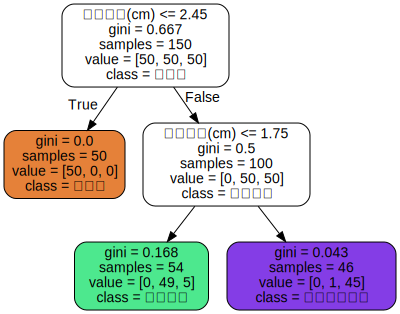

In [40]:
dot

# 做出预测
我们来看看上图是如何做出预测的。如果我们找到了一朵鸢尾花。想要将其归类，那么从根节点(深度为0，位于顶部)开始：这朵花的花瓣长度是否小于2.45cm？如果是，则前往左侧子节点(深度1，左)。在本例中，这是一个叶节点(即没有任何子节点)，所以它不再继续提出问题，我们可以直接查看这个节点的预测类别，也就是说，决策树预测我们的这朵花为山鸢尾花。<br>
假设我们又找到一朵花，但是这次的花瓣长度大于2.45cm。我们需要移动到右子节点(深度1，右)，该节点不是叶节点，所以它提出另一个问题：花瓣宽度是否小于1.75cm？如果是，那么这朵花可能是变色鸢尾花(深度2，左),如果不是，那就可能是维吉尼亚鸢尾花(深度2，右)<br>
决策树的特质之一就是它们需要的数据准备非常少，特别是，完全不需要进行特征缩放或集中。<br>
sample属性统计了它应用的训练实例数量。
<br>
gini属性衡量其不纯度：如果应用的所有训练实例都属于同一个类别，那么节点就是纯的(gini=0)，深度2左侧节点的基尼系数为$1-(0/54)^2-(49/54)^2-(5/54)^2=0.168$ 

### 基尼不纯度
一个随机事件变成它的对立事件的概率
$$
G_i=-\sum_{k=1}^{n}P_{i,k}^2
$$$P_{i,k}$
- 是第i个节点上，类别k的训练实例占比
<br>

### 信息熵  [举例(来自一知乎网友公众号)](https://mp.weixin.qq.com/s?__biz=MzI1OTYwNDE2Mg==&mid=2247483753&idx=1&sn=acec759cf688e21660b61e791986bfac&chksm=ea772ac4dd00a3d239995c8e6b9e83159e1ddd35781ec2109e1e0b6678f088001d988ca5756f&token=47119943&lang=zh_CN#rd)
信息越复杂，信息熵就越大，反之越简单越小

sklearn使用CART算法，该算法仅生成二叉树:非叶节点永远只有两个子节点(即问题的答案只有是和否)。但是其他算法，比如ID3生成的决策树算法，其节点可以拥有两个以上的子节点。

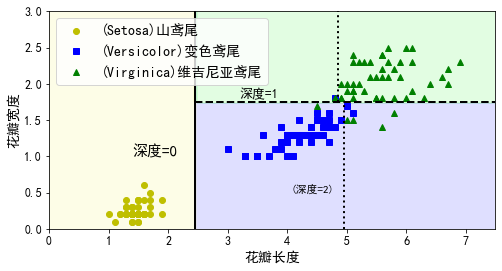

In [22]:
#tu6-2
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    # 打表
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    # 取得图上每一个格子的预测类别
    y_pred = clf.predict(X_new).reshape(x1.shape)
    # 标定每一个类别的颜色
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    # 对每一个格子涂上颜色
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    #  针对不是鸢尾花数据集的时候
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="(Setosa)山鸢尾")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="(Versicolor)变色鸢尾")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="(Virginica)维吉尼亚鸢尾")
        plt.axis(axes)
    if iris:
        plt.xlabel("花瓣长度", fontsize=14)
        plt.ylabel("花瓣宽度", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="upper left", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y,legend=True)
# 手动绘制决策边界
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
# 手动打上标签
plt.text(1.40, 1.0, "深度=0", fontsize=15)
plt.text(3.2, 1.80, "深度=1", fontsize=13)
plt.text(4.05, 0.5, "(深度=2)", fontsize=11)
plt.show()

上图（6-2）显示了决策树的决策边界。加粗直线表示根节点(深度0)的决策边界：花瓣长度=2.45。因为左侧区是纯的，左移不可再分。但是右侧区域是不纯的，所以深度1右侧的节点在花瓣宽度=1.75cm处再次分裂。因为这里最大深度max_depth=2.所以决策树再次停止。但是如果我们设置为3，那么两个深度为2的节点将各自再产生一条决策边界。

如你所见，决策树是非常直观的，它们的决策也很容易解释，这类模型通常被称为百盒模型。与之相反的，我们稍后将会看到，随机森林或是神经网络模型被认为是一种黑盒模型。它们能做出很棒的预测，我们也可以轻松检测它们做出预测时执行的计算。然而，通常很难解释它们为什么做出这样的预测。比如，如果神经网络说某个人出现在一张图片上，很难知道它实际是基于什么做出的该预测：是模型识别出来了这个人的眼睛？嘴巴？鼻子？还是鞋子？甚至 是她坐的沙发？相反，决策树提供了简单好用的分类规则。需要的话，我们甚至可以手动应用这些规则(例如，花的分类)。

估算类别概率
决策树同样也可以估算某个实例属于特定类别k的概率：首先，跟随决策树找到该实例的叶节点，然后返回该节点中类别k的训练实例占比。<br>
例如，假设我们发现一朵花，其花瓣长5cm，宽1.5cm。相应的叶节点为深度2左侧节点，因此决策树输出如下概率：Setosa鸢尾花，0(0/54),Versicolor鸢尾花90.7%(49/54)Virginica鸢尾花,9.3%(5/54)。

In [23]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

当然，如果我们要求它预测类别，那么它应该输出(Versicolor)变色鸢尾花(类别1)

In [24]:
tree_clf.predict([[5, 1.5]])

array([1])

需要注意的是，在（6-2）矩阵内的任意点的估算概率都相同，比如-花瓣长6cm，宽1.5cm，概率还是一样的，虽然现在看起来，大概率应该是Verginica鸢尾花。

## CART训练算法
Sklearn使用分类与回归树(Classification And Regression Tree 简称CART)算法来训练决策树(也叫做"生长"树)。做法很简单：首先，使用单个特征k和阈值$t_k$（例如，花瓣长度$\leq$2.45cm）将训练集分成两个子集。k和阈值$t_k$怎么选择？答案是产出最纯的子集(受其大小加权)的k和$t_k$就是经算法搜索确定的$(t,t_k)$.
## CART分类损失函数 
$$ J(k,t_k)=\frac{m_{left}}{m}G_{left}+\frac{m_{right}}{m}G_{right}\\ 其中, \begin{cases} G_{left/right}衡量左/右子集的不纯度\\ m_{left/right}是左/右子集的实例数量 \end{cases} $$

一旦成功将训练集一分为二，他将使用相同的逻辑，继续分裂子集，然后是子集的子集，依次循环递进。直到抵达最大深度(由超参数max_depth控制)，或是再也找不到能够降低不纯度的分裂，它才会停止。当然，还有一些超参数会在之后介绍。

如你所见：CART是一种贪婪算法：从顶层开始搜索最优分裂，然后每层重复这个过程。几层分裂以后，它不会检视这个分裂的不纯度是否为可能的最低值。贪婪算法通常会产生一个相当不错的解，但不能保证是最优解。

而不幸的是，寻找最优树是一个已知的NP完全问题：需要的时间是O(exp(m))，所以即使是很小的训练集，也相当棘手，这就是为什么我们必须接受一个“相当不错”的解。

# 计算复杂度
进行预测需要从根到叶遍历决策树。通常来说，决策树大致平衡，因此遍历决策树需要经历大约$O(\log_2(m))$个节点。而每个节点只需要检查一个特征值，所以总体预测复杂度也只是$O(\log_2(m))$,与特征数量无关。如此，即便是处理大型数据，预测也很快。

但是，训练时在每一个节点，算法都需要在所有样本上比较所有特征(如果设置了max_features会少一点)。这导致训练的复杂度为$O(n\times m(\log(m)))$。对于小型训练集(几千个实例以内),sklearn可以通过对数据进行预处理(设置presort=True)来加快训练，但是对于较大训练集而言，可能会减慢训练的速度。

# 基尼不纯度还是信息熵(这两个是啥，往上翻)
默认使用基尼不纯度来进行测量，但是，我们可以将超参数criterion设置为"entropy"来选择信息熵作为不纯度的测量方式。熵的概念源于热力学，是一种分子混乱程度的度量：如果分子保持静止和良序，则熵接近于零。后来这个概念传播到各个领域，其中包括香农的信息理论，它衡量的是一条信息的平均信息内容：如果所有信息都相同，则熵为0.

在机器学习中，它也经常被用作一种不纯度的测量方式：如果数据集中仅包含一个类别的实例，则熵为0.
信息熵$$
H_i=-\sum_{k=1\\P_{i,k}\ne0}^{n}P_{i,k}\log(P_{i,k})
$$以深度2左侧节点为例：$-\frac{49}{54}\log(\frac{49}{54})-\frac{5}{54}\log(\frac{5}{54})\approx0.31$

那么我们到底该选择基尼不纯度还是信息熵呢？其实，大多数情况下它们并没有什么大的不同，产生的树很相似。基尼不纯度的计算速度略微快一些，所以它是个不错的默认选择。它们的不同在于，基尼不纯度倾向于从树枝中分裂出最常见的类别，而信息熵则倾向于生产更平衡的树。

# 正则化超参数
决策树极少对训练数据做出假设(比如线性模型就正好相反，它显然假设数据是线性的)。如果不加以限制，树的结构就随着训练集变化，严密拟合，并且很可能导致过拟合。这种模型通常被称为非参数模型，这不是说它不包含任何参数(事实上它通常有很多参数),而是指在训练之前没有确定参数的数量，导致模型结构自由而紧密地贴近数据。相应的参数模型，比如线性模型，择优预先设定好的一部分参数，因此其自由度受限，从而降低了过度拟合的风险(也就是增加了拟合不足的风险)。
<br>
为避免过度拟合，我们会选择降低训练过程中决策树的自由度，也就是控制决策树的深度(通过max_depth来控制)。
<br><br>
此外决策树还有其他超参数可以限制决策树的形状：<br>
min_samples_split(分裂前节点必须有的最小样本数)<br>
min_samples_leaf(叶节点必须有的最小样本数)<br>
min_weight_fraction_keaft(跟min_samples_leaf一样，但是表现为加权实例总数的占比)<br>
max_leaf_nodes(最大叶节点数量)<br>
以及max_features(分裂每个节点评估的最大特征数)。增大超参数min_或是减小max_将使模型正则化。
<br><br>
此外，还可以先不加约束地训练模型，然后再剪枝。

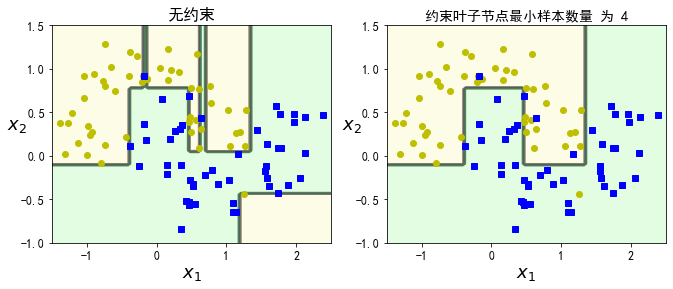

In [27]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)   #这是一个无约束(随机数种子除外)的决策树模型
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)  #这是一个约束了叶子节点最少样本数的决策树模型
deep_tree_clf1.fit(Xm, ym)#分别带入训练
deep_tree_clf2.fit(Xm, ym)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("无约束", fontsize=16)
plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("约束叶子节点最小样本数量 为 {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)

plt.show()

# 回归
决策树不仅可以执行分类任务，也可以执行回归任务。

In [29]:
# 一个带噪声的二次数据集
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [30]:
#训练决策树模型
from sklearn.tree import DecisionTreeRegressor  #树-决策树回归器

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)  #限制最大叶节点数为2
tree_reg.fit(X, y)#带入训练

DecisionTreeRegressor(max_depth=2, random_state=42)

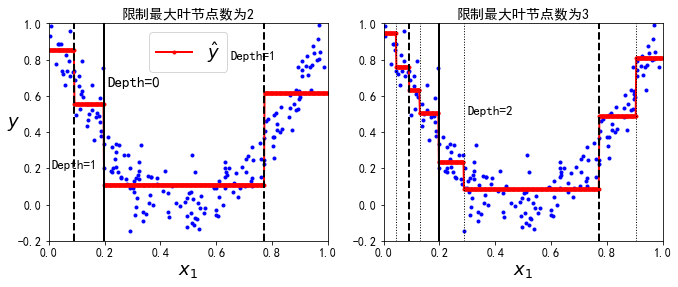

In [31]:
#图6-5
from sklearn.tree import DecisionTreeRegressor   #树-决策树回归器

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)#限制最大叶节点数为2
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)#限制最大叶节点数为3
tree_reg1.fit(X, y)  #带入训练
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("限制最大叶节点数为2", fontsize=14)

plt.subplot(122)
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("限制最大叶节点数为3", fontsize=14)

plt.show()

##### 注意观察，每个区域的预测值永源等于该区域内的实例的平均值，分裂更多的区域（叶子节点）就能更加接近预测值

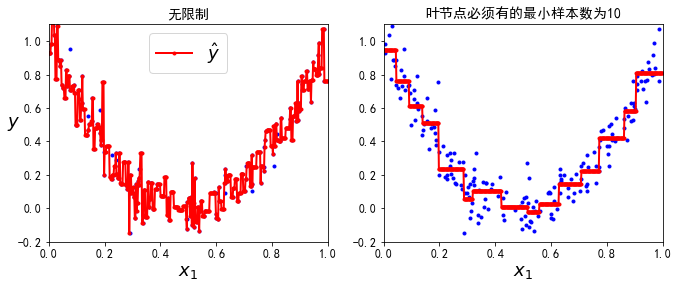

In [33]:
#图6-6
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("无限制", fontsize=14)

plt.subplot(122)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("叶节点必须有的最小样本数为{}".format(tree_reg2.min_samples_leaf), fontsize=14)

plt.show()

##### 决策树在做回归任务时与分类任务一样，也很容易过拟合，与分类任务一样，可以通过限制叶节点必须有的最小样本数来缓解

#不稳定性
希望现在，你已经确信了选择决策树的充足理由：他们很容易理解和解释，使用简单，功能全面并且十分强大。但是，它们确实也有一些限制。

1. 首先，决策树青睐正交的决策边界，这导致其在面对训练集的旋转非常敏感。如下面的两个对比。限制这种问题的方法之一是使用PCA，后面介绍。
1. 其次，决策树对训练集的小变化非常敏感。

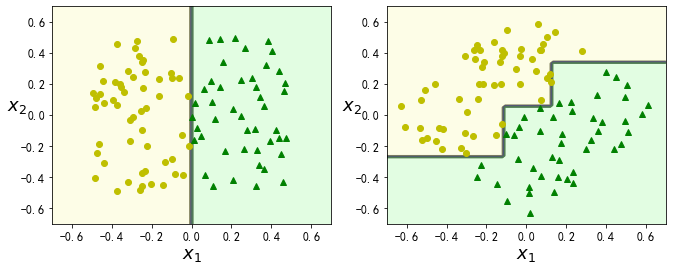

In [34]:
#对旋转数据敏感
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

# 旋转角度
angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.subplot(122)
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)

plt.show()

In [38]:
# 移除 花瓣长4.8cm 宽1.8的数据 
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
X[(X[:, 1]==X[:, 1][y==1].max()) & (y==1)] # widest Iris-Versicolor flower

array([[4.8, 1.8]])

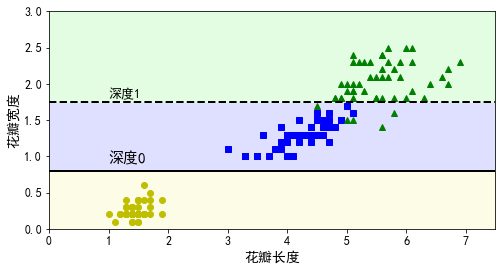

In [39]:
not_widest_versicolor = (X[:, 1]!=1.8) | (y==2)
X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "深度0", fontsize=15)
plt.text(1.0, 1.80, "深度1", fontsize=13)

plt.show()